In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec 
import corner

In [3]:
dataPar = np.load("19_dke_samples_fup.npy")
ndim = 4
print(dataPar.shape)
steps = 3000
n_dim = 5 + (2 * 10)
samples = dataPar.reshape((-1, n_dim))

# parameters
t0 = samples[:,0]
u0 = samples[:,1]
te = samples[:,2]
pien = samples[:,3]
piee =  samples[:,4]
# G
fluxs1 =  samples[:,5]
fluxb1 =  samples[:,6]
fs1 = fluxs1/(fluxs1+fluxb1)
I01 = 22-2.5*np.log10(fluxs1+fluxb1)


data_cut = np.hstack((u0.reshape(len(t0),1), te.reshape(len(t0),1),
                      pien.reshape(len(t0),1), piee.reshape(len(t0),1)))

data_cut

(1000, 1000, 25)


array([[-6.14067336e-01,  1.61873627e+02, -9.13453318e-02,
        -1.92144224e-01],
       [-6.14067336e-01,  1.61873627e+02, -9.13453318e-02,
        -1.92144224e-01],
       [-6.14067336e-01,  1.61873627e+02, -9.13453318e-02,
        -1.92144224e-01],
       ...,
       [-6.28944196e-01,  1.60550011e+02, -9.24236503e-02,
        -1.94018958e-01],
       [-6.17477187e-01,  1.62021967e+02, -9.17089497e-02,
        -1.92462717e-01],
       [-6.17085335e-01,  1.61893434e+02, -9.17624331e-02,
        -1.92649820e-01]])

In [6]:
parameters = [ "$u_0$",
                "$t_E$",
                "$\pi_{EN}$",
                "$\pi_{EE}$"
                ]

In [7]:
medians = np.median(data_cut, axis=0)
medians

array([-6.10003453e-01,  1.62365463e+02, -9.10544170e-02, -1.92266115e-01])

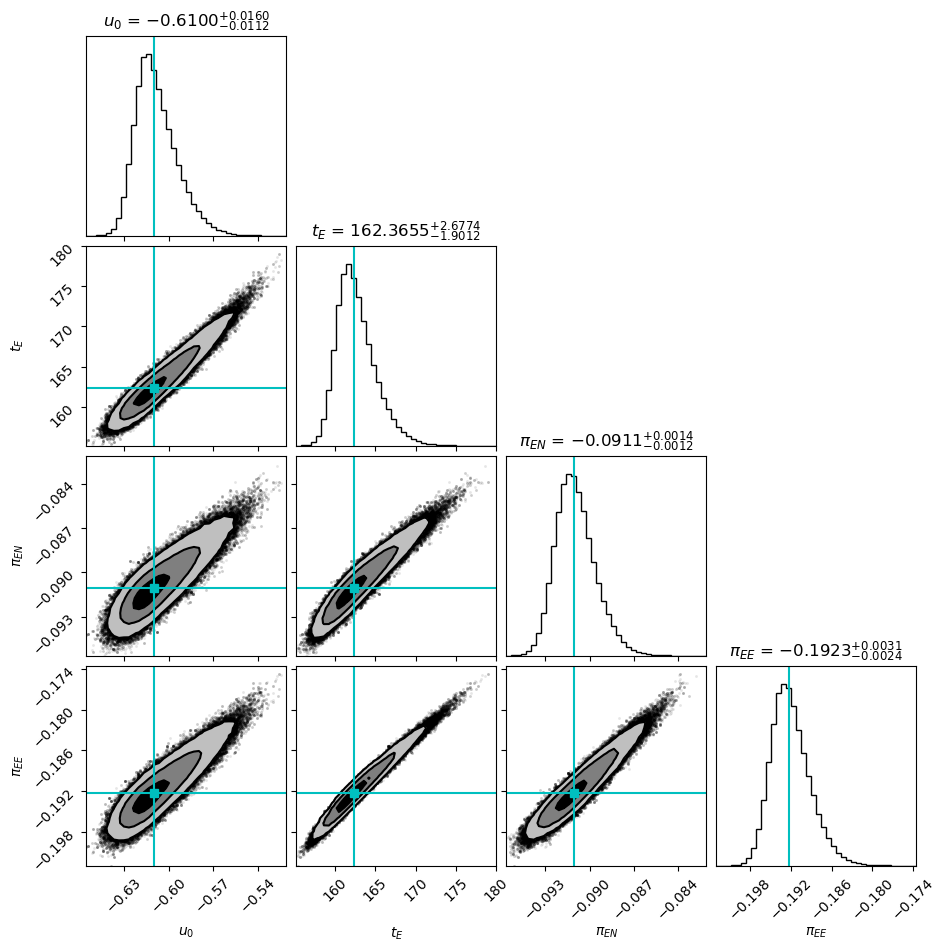

In [8]:
np.save("Gaia19dke_dlc_fup.npy", data_cut)

fig_corner = corner.corner(data_cut, bins=40, color='k', fontsize=100, 
                    show_titles=True, verbos=True, title_fmt='.4f', 
                    labels=parameters, 
                    plot_datapoints=True, levels=(1-np.exp(-0.5), 1-np.exp(-2.), 1-np.exp(-9./2.)), fill_contours=True)


axes = np.array(fig_corner.axes).reshape((ndim, ndim))

for i in range(ndim):
    ax = axes[i, i]
    ax.axvline(medians[i], color="c")

for yi in range(ndim):
    for xi in range(yi):
        ax = axes[yi, xi]
        ax.axvline(medians[xi], color="c")
        
        ax.axhline(medians[yi], color="c")
        ax.plot(medians[xi], medians[yi], "sc")

plt.savefig("Images/Gaia19dke_corner_fup_full.pdf", dpi=300)